<a href="https://colab.research.google.com/github/penny1xu/Capstone-Project/blob/main/Decision_Tree_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Classification Model

We will use the built in Pima Indians Diabetes dataset. It is available as part of the SKlearn datasets. We have made it easily available for you.

In [ ]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/pima-indians-diabetes.csv", header=None, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(min_samples_leaf=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.75      0.90      0.82       146
           1       0.73      0.48      0.58        85

    accuracy                           0.74       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Accuracy:  0.7445887445887446


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X.columns

Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')

In [ ]:
classes = y.unique()

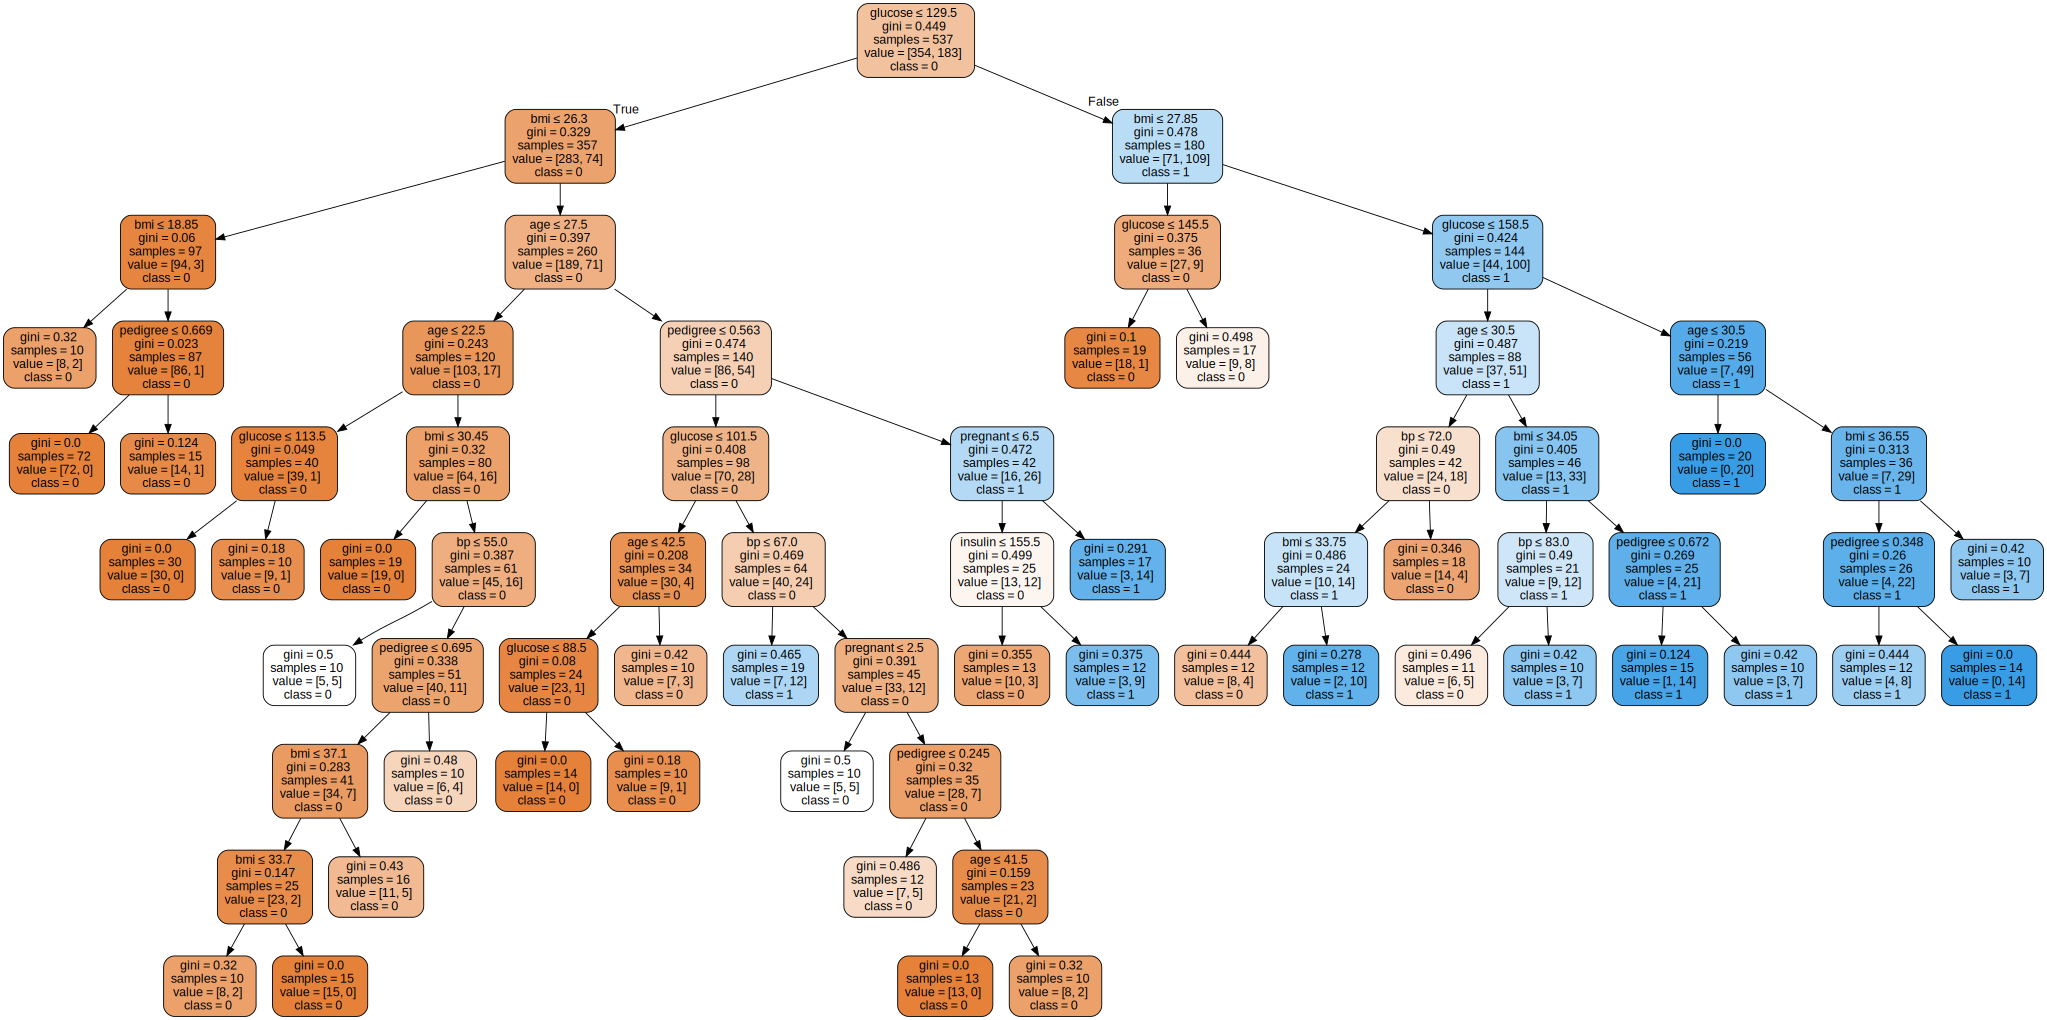

In [ ]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names = feature_cols,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Application on Cuisines Dataset

In [ ]:
import pandas as pd
cuisines_df = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/cuisines.csv")
cuisines_df.head()

In [ ]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

In [ ]:
cuisines_label_df.value_counts()

In [ ]:
type(cuisines_label_df)

In [ ]:
cuisine_labels_distinct = cuisines_label_df.unique()

In [ ]:
cuisine_labels_distinct

In [ ]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=cuisines_feature_df.columns,  
                     class_names=cuisine_labels_distinct,  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

In [ ]:
rf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators = 100)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

In [ ]:
cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")

In [ ]:
X = cars[['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'size']]

In [ ]:
y = cars['origin']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=y.unique(),  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Parameter Grid Builder for Parameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

dt_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('dt', DecisionTreeClassifier())])
params = [{'dt__max_depth': [3, 5, 7, 9],
         'dt__min_samples_leaf': [2, 3, 5]}]
         
gs_dt = GridSearchCV(dt_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_dt.fit(cuisines_feature_df, cuisines_label_df)
print(gs_dt.best_params_)
# find best model score
print(gs_dt.score(cuisines_feature_df, cuisines_label_df))


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rf = RandomForestClassifier()

params = {'max_depth': [5, 7, 9], 
          'n_estimators': [50, 100, 200],
          'max_features': ['sqrt', 'log2']
          }  

grid = GridSearchCV(rf, params, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(cuisines_feature_df, cuisines_label_df)

print(grid.best_params_)
# find best model score
print(grid.score(cuisines_feature_df, cuisines_label_df))

# Regression Trees

In [ ]:
cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")

In [ ]:
cars.head()

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import preprocessing

X = cars[['cyl', 'displ', 'hp', 'weight', 'accel', 'origin', 'size']]
y = cars['mpg']
le = preprocessing.LabelEncoder()
X['origin'] = le.fit_transform(X['origin'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# finish
predictions = regressor.predict(X_test)

print("R2 square = ", r2_score(y_test, predictions))
print("MSE = ", mean_squared_error(y_test, predictions))
print("MAE = ", mean_absolute_error(y_test, predictions))
print("Explained variance score = ", explained_variance_score(y_test, predictions))

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(regressor, out_file=None, 
                     feature_names=X.columns,  
                     class_names=y.unique(),  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 